In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import pathlib
import sys
import pickle
sys.path.append('../../mnoc_urology/lib')
sys.path.append('../../mnoc_urology/')
%pylab inline

import pandas as pd
import pathlib
import sys
# sys.path.append('/2tb_drive/Boris')
sys.path.append('../../lib')
sys.path.append('../../')


import lab_tools.plot_utils as pu
pu.load_figure_style()
#import occlusion as oc
import importlib
import surgical_fluorimeter as sf
import surgical_processor as sp
import sync
importlib.reload(sync)
importlib.reload(sf)
importlib.reload(sp)
import matplotlib.pyplot as plt
import processing.data as ipd
import processing.spectra_processing as psp
import processing.labeling as ipl
import processing.sampling as ips
import processing.classification as ipc
# sys.path.append('/notebooks/thyroid/fit/')
# import hb_fit



# def load_spectra_data(path, mask='*.hdf'):
#     return sorted(path.glob(mask), key=sp.datetime_from_path)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/gleb/venvs/jupyterhub_env/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time', 'compress']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [45]:
import pandas as pd
import io

In [46]:
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['figure.figsize'] = (6.4, 4.8)
mpl.rcParams['axes.titlesize'] = 16

In [77]:
data_folder = '/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/'
path = pathlib.Path(data_folder)

In [78]:
def load_spectra_data(path, mask='*.hdf'):
    return sorted(path.glob(mask))

In [79]:
files = load_spectra_data(path, mask='*.hdf')

In [80]:
files

[PosixPath('/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/12_46_38_316569_311_0_mm.hdf'),
 PosixPath('/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/12_47_00_460301_311_1_mm.hdf'),
 PosixPath('/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/12_47_15_683134_311_2_mm.hdf'),
 PosixPath('/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/12_49_49_237502_411_0_mm.hdf'),
 PosixPath('/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/12_50_49_208586_411_1_mm.hdf'),
 PosixPath('/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/12_51_05_483933_411_2_mm.hdf'),
 PosixPath('/4tb_drive/ipython/data/surgical_fluorimeter/urology/stones/stone_type_density/drs_kno/07_11_2023/13_02_05_926820_511_0_mm.hdf'),
 Posix

In [81]:
def load_record_files(record_files):
    
    od_specs = []
    specs = []
    lights = []
    darks = []
    comments = []
    for file in record_files:

        with pd.HDFStore(file, mode='r') as f:
            data = f.get('data')
            light = f.get('light')
            dark = f.get('dark')
            comment = list(f.get('comment').values)
        spec = data.T
        od_spec = -np.log10((spec.sub(dark, axis=0)).div(light - dark, axis=0))
        specs_ser = [sp for i, sp in spec.items()]
        od_ser = [sp for i, sp in od_spec.items()]
        specs.extend(specs_ser)
        od_specs.extend(od_ser)
        comments.extend(comment)
    dict_df = {'spectra': specs, 'OD': od_specs, 'name': comments}
    df_all = pd.DataFrame(dict_df)
    
    return df_all

In [82]:
from datetime import time

In [83]:
def name_to_stem(name):
    stem = name.stem[16:]
    return stem

stems = [name_to_stem(file) for file in files]

In [84]:
stems

['311_0_mm',
 '311_1_mm',
 '311_2_mm',
 '411_0_mm',
 '411_1_mm',
 '411_2_mm',
 '511_0_mm',
 '511_1_mm',
 '511_2_mm',
 '611_0_mm',
 '611_1_mm',
 '611_2_mm',
 '711_0_mm',
 '711_1_mm',
 '711_2_mm',
 '811_0_mm',
 '811_1_mm',
 '811_2_mm']

In [85]:
garbage_names = [

]

from itertools import compress
mask = np.array([False if ele in garbage_names else True for ele in stems])
masked_exp_files = list(compress(files, mask))

In [73]:
df = load_record_files(masked_exp_files)

/home/gleb/venvs/jupyterhub_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/home/gleb/venvs/jupyterhub_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)
/home/gleb/venvs/jupyterhub_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/home/gleb/venvs/jupyterhub_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)
/home/gleb/venvs/jupyterhub_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/home/gleb/venvs/jupyterhub_env/lib/python3.10/site-packa

In [87]:
def get_stone_from_stem(stem):   
    return stem.split('_')[0]  

def get_distance_from_stem(stem):
    return stem.split('_')[1]

def get_comment_from_stem(stem):
    if '_exp' in stem:
        return 'No comments'
        
    elif len(stem.split('_')) >= 4:
        return stem.split('_')[3]
    else:
        return 'No comments'
    
def full_stone_name(number, comment):
    if comment == 'No comments':
        return number
    else:
        return number + '_' + comment

In [88]:
df['number'] = df.name.apply(get_stone_from_stem)
df['distance'] = df.name.apply(get_distance_from_stem)
df['comment'] = df.name.apply(get_comment_from_stem)

number_and_comment = []
for number, comment in zip(df['number'], df['comment']):
    number_and_comment.append(full_stone_name(number, comment))
df['stone'] = number_and_comment

In [89]:
df.stone.unique()

array(['311', '411', '511', '611', '711', '811'], dtype=object)

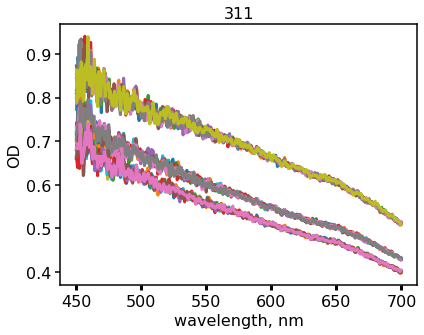

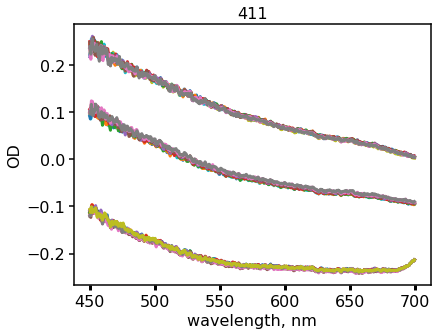

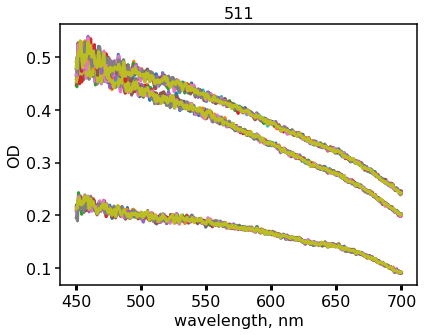

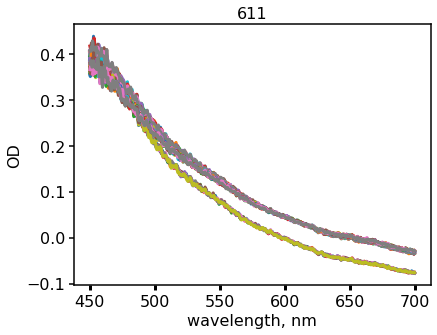

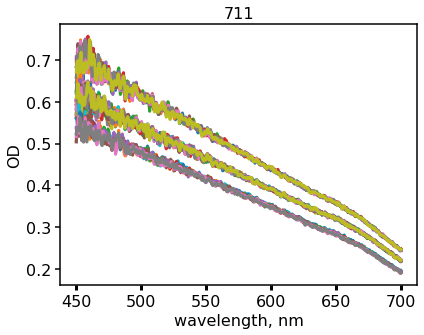

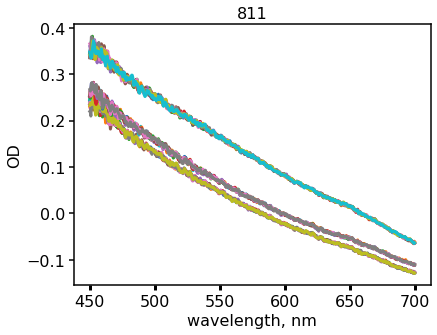

In [90]:
for name, group in df.groupby('stone'):
    figure()
    spectra = group.OD.apply(lambda x: x.loc[450:700]).T 
    plot(spectra)
    plt.title(name)
    plt.xlabel('wavelength, nm')
    plt.ylabel('OD')

In [91]:
def get_new_df(df):
    mask = df.distance == '1'
    part = df[mask]
    means = []
    names = []
    for name, group in part.groupby('stone'):
        meanspec = group.OD.apply(lambda x: x).mean().rolling(20, center = True).mean(engine='numba').loc[450:600]
        means.append(meanspec)
        names.append(name)
        
    ddf = pd.concat(means, axis = 1).T
    ddf['stone'] = names
    return ddf

new_df = get_new_df(df)

In [92]:
new_df.stone.unique()

array(['311', '411', '511', '611', '711', '811'], dtype=object)

In [93]:
import pickle

path = '../stone_density_type/pickles/'
with open(path + '07_11_2023_drs', 'wb') as file:
    pickle.dump(new_df, file)